In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [2]:
# Importing all the required packages

import pandas as pd
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns', 786)
pd.set_option('display.max_rows', 300)

### Reading Train and Test datasets

Reading train dataset which will be divided into training and test set.

In [3]:
# Reading training dataset
train_df = pd.read_csv("train.csv")
train_df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

Reading test dataset which will be used for final submission to kaggle.

In [4]:
# Reading test dataset
test_df = pd.read_csv("test.csv")
test_df.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel

In [5]:
#inspecting train dataframe

print(train_df.shape)
train_df.info()

(42000, 785)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [6]:
# Number of missing values in each column.

train_df.isnull().values.any()

False

In [7]:
train_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

#### Observations:
1. No nulls in the dataset.
1. Labels seems to be evenly distributed.
2. Many pixels contains all values as 0. These zeros are significant as we have range of  0-255 in 8 bits. This will be used in the model for predictions. So, we can use this as is.

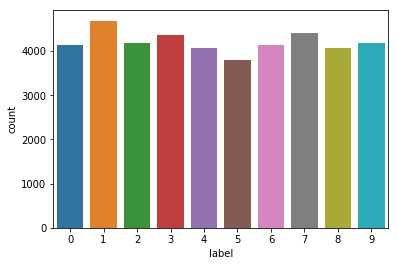

In [8]:
# Visualizing the distribution of the digits in the training dataset

sns.countplot(train_df.label)
plt.show()

Data is evenly distributed among all the labels.

In [9]:
# Taking sample 20% of the total dataset for training as it will take very long to train on entire dataset.

sampled_df = train_df.sample(frac = .20, random_state=100)

In [10]:
sampled_df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

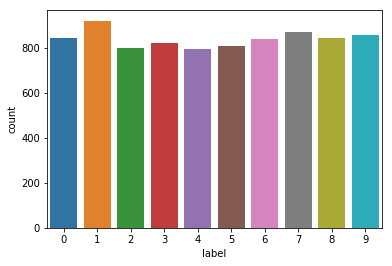

In [11]:
# Visualizing the distribution of the digits in the training dataset
sns.countplot(sampled_df.label)
plt.show()

We can use this sample as it is quite evenly distributed.

#### Doing the test train split:
Since the test data is not having labels. We will do a test train split on this sampled data.

In [12]:
# Creating X and y on training sample

y = sampled_df['label']
X = sampled_df.drop(['label'], axis=1)

In [13]:
# Test-Train Split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

To check for model performance we are doing this test train split as the final test data is not labeled.

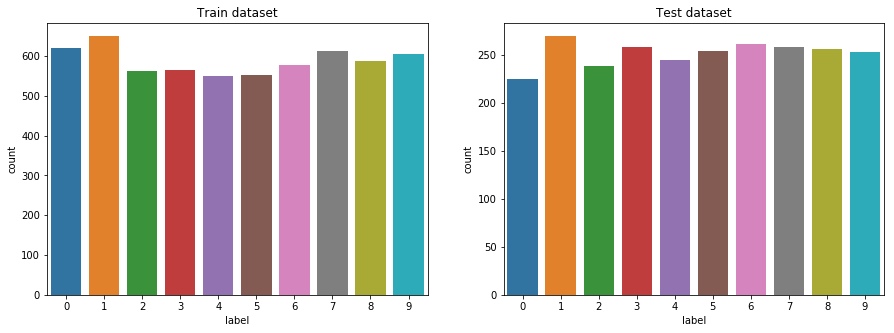

In [14]:
# Visualizing the distribution of labels across test and train split used for model creation.

plt.figure(figsize=(15,5))
plt.subplot(121)
sns.countplot(y_train)
plt.title('Train dataset')
plt.subplot(122)
sns.countplot(y_test)
plt.title('Test dataset')
plt.show()

Data is evenly distributed across labels in both test and train sets.

In [15]:
# Converting datatypes of the columns to float to avoid data conversion warning while scaling the data.

X_train = X_train.astype(float)
X_test = X_test.astype(float)

# Scaling data

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [16]:
# Scaling test dataset without labels. 

test_df = test_df.astype(float) 
test_df_scaled = scaler.transform(test_df)

## Model Building

We will start with a linear model. Check the accuracy and than do a non-linear (RBF) model. Compare their performance.

In [17]:
linear_model = SVC(kernel='linear')

linear_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [18]:
# predicting using linear model

y_pred = linear_model.predict(X_test)

In [19]:
# Accuracy of the linear model

metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.9023809523809524

We are only interested in accuracy of the model.

We are getting Accuracy = .902 on the test-set identified from the labeled data.

In [20]:
# Confusion Matrix for the linear model

metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[220,   0,   1,   1,   0,   2,   1,   0,   0,   0],
       [  0, 263,   0,   0,   0,   1,   0,   1,   4,   1],
       [  1,   3, 212,   7,   4,   2,   3,   3,   3,   1],
       [  0,   3,   3, 225,   0,  15,   1,   3,   5,   3],
       [  0,   0,   2,   0, 228,   1,   1,   0,   2,  11],
       [  3,   4,   2,  15,   2, 221,   3,   0,   3,   1],
       [  4,   3,   3,   0,   3,   3, 246,   0,   0,   0],
       [  1,   2,   3,   2,   6,   1,   0, 232,   0,  11],
       [  2,   2,   6,  11,   3,   8,   2,   4, 216,   2],
       [  2,   1,   0,   1,  20,   3,   0,  14,   1, 211]], dtype=int64)

Confusion matrix C is such that c(i,j) is equal to the number of observations known to be in group i but predicted to be in group j. 

i.e. there are a total of 225 zeros out of which model correctly predicted 220 and 5 were predicted as other numbers.

#### Non Linear SVM

In [21]:
non_linear_model = SVC(kernel='rbf')

non_linear_model.fit(X_train, y_train)

C:\Users\arisethi\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [22]:
# predicting using non-linear model

y_pred = non_linear_model.predict(X_test)

In [23]:
# Accuracy of the non-linear model

metrics.accuracy_score(y_true=y_test, y_pred=y_pred)

0.9321428571428572

Accuracy increased from .902 to .932 when we choose RBF kernel.

In [24]:
# Confusion Matrix 

metrics.confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[222,   0,   0,   1,   0,   0,   1,   1,   0,   0],
       [  0, 264,   0,   0,   2,   0,   1,   0,   2,   1],
       [  1,   1, 218,   3,   3,   1,   1,   7,   4,   0],
       [  1,   4,   2, 232,   0,   5,   2,   5,   5,   2],
       [  0,   0,   2,   0, 231,   1,   1,   2,   2,   6],
       [  0,   3,   1,   5,   2, 237,   0,   2,   3,   1],
       [  2,   1,   1,   0,   0,   2, 250,   6,   0,   0],
       [  1,   1,   2,   3,   3,   0,   0, 241,   0,   7],
       [  5,   4,   2,   3,   2,   6,   2,   3, 226,   3],
       [  2,   1,   0,   2,   9,   2,   0,   6,   3, 228]], dtype=int64)

We can see that accuracy for each digit is increased.

## Grid Search: Hyperparameter Tuning
Let's now tune the model to find the optimal values of C and gamma corresponding to an RBF kernel. We'll use 5-fold cross validation.

In [25]:
# creating a KFold object with 5 splits 
folds = KFold(n_splits = 5, shuffle = True, random_state = 100)

# specify range of hyperparameters
# Set the parameters by cross-validation
hyper_params = [ {'gamma': [1e-2, 1e-3, 1e-4],
                     'C': [1, 10, 100, 1000]}]


# specify model
model = SVC(kernel="rbf")

# set up GridSearchCV()
# set the value of n_jobs based on the number of processors to be utilized. n_jobs = -1 will utilize all available processors.
# Running on 6 processors to finish the GridSearch faster.

model_cv = GridSearchCV(estimator = model, 
                        param_grid = hyper_params, 
                        scoring= 'accuracy', 
                        cv = folds, 
                        verbose = 1,
                        return_train_score=True,
                       n_jobs = 6)      

# fit the model
model_cv.fit(X_train, y_train)   

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=6)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=6)]: Done  38 tasks      | elapsed: 11.4min
[Parallel(n_jobs=6)]: Done  60 out of  60 | elapsed: 15.6min finished


GridSearchCV(cv=KFold(n_splits=5, random_state=100, shuffle=True),
       error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=6,
       param_grid=[{'gamma': [0.01, 0.001, 0.0001], 'C': [1, 10, 100, 1000]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='accuracy', verbose=1)

In [26]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,100.152177,0.597729,12.251800,0.042649,1,0.01,"{'C': 1, 'gamma': 0.01}",0.718537,0.738946,0.733844,0.735544,0.710884,0.727551,0.010884,12,1.000000,1.000000,0.999787,0.999787,0.999575,0.999830,0.000159
1,27.822626,0.760669,7.963221,0.193702,1,0.001,"{'C': 1, 'gamma': 0.001}",0.920068,0.925170,0.920068,0.932823,0.902211,0.920068,0.010076,4,0.970876,0.971726,0.968325,0.967049,0.974490,0.970493,0.002615
2,40.830109,0.546685,10.295051,0.458525,1,0.0001,"{'C': 1, 'gamma': 0.0001}",0.886905,0.892007,0.888605,0.887755,0.889456,0.888946,0.001751,8,0.907313,0.904337,0.904124,0.904124,0.904974,0.904974,0.001210
3,102.158635,0.923914,12.606255,0.244124,10,0.01,"{'C': 10, 'gamma': 0.01}",0.735544,0.755102,0.754252,0.757653,0.734694,0.747449,0.010133,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
4,23.167600,0.464173,6.805001,0.140928,10,0.001,"{'C': 10, 'gamma': 0.001}",0.928571,0.926871,0.937925,0.943027,0.914966,0.930272,0.009695,3,0.998937,0.998937,0.999362,0.999150,0.999150,0.999107,0.000159
5,17.761547,0.194511,6.233680,0.064857,10,0.0001,"{'C': 10, 'gamma': 0.0001}",0.917517,0.922619,0.914966,0.929422,0.898810,0.916667,0.010204,6,0.958759,0.959609,0.957483,0.955570,0.961522,0.958588,0.002001
6,96.769408,0.689828,11.907173,0.089878,100,0.01,"{'C': 100, 'gamma': 0.01}",0.735544,0.755102,0.754252,0.757653,0.734694,0.747449,0.010133,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
7,22.862438,0.183220,6.675214,0.062365,100,0.001,"{'C': 100, 'gamma': 0.001}",0.927721,0.927721,0.940476,0.944728,0.914966,0.931122,0.010552,1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
8,13.501542,0.117137,5.225178,0.048206,100,0.0001,"{'C': 100, 'gamma': 0.0001}",0.920918,0.914116,0.916667,0.930272,0.903912,0.917177,0.008615,5,0.993835,0.994685,0.994260,0.993835,0.995748,0.994473,0.000711
9,97.389353,0.760434,12.193301,0.357514,1000,0.01,"{'C': 1000, 'gamma': 0.01}",0.735544,0.755102,0.754252,0.757653,0.734694,0.747449,0.010133,9,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000


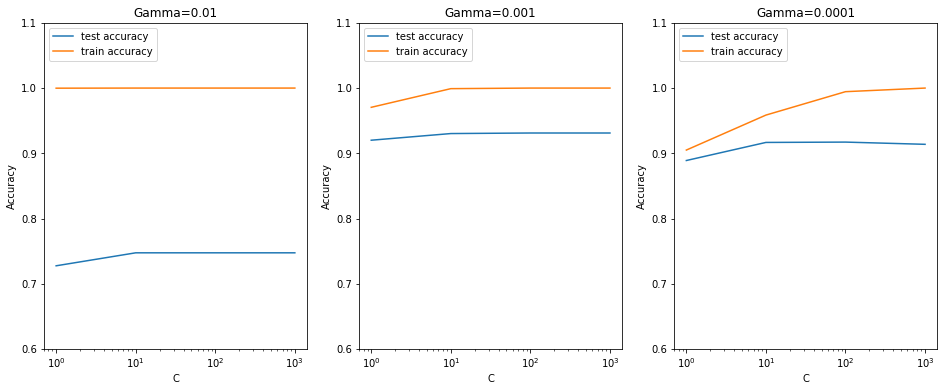

In [27]:
# converting C to numeric type for plotting on x-axis
cv_results['param_C'] = cv_results['param_C'].astype('int')

# # plotting
plt.figure(figsize=(16,6))

# subplot 1/3
plt.subplot(131)
gamma_01 = cv_results[cv_results['param_gamma']==0.01]

plt.plot(gamma_01["param_C"], gamma_01["mean_test_score"])
plt.plot(gamma_01["param_C"], gamma_01["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.01")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

# subplot 2/3
plt.subplot(132)
gamma_001 = cv_results[cv_results['param_gamma']==0.001]

plt.plot(gamma_001["param_C"], gamma_001["mean_test_score"])
plt.plot(gamma_001["param_C"], gamma_001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')


# subplot 3/3
plt.subplot(133)
gamma_0001 = cv_results[cv_results['param_gamma']==0.0001]

plt.plot(gamma_0001["param_C"], gamma_0001["mean_test_score"])
plt.plot(gamma_0001["param_C"], gamma_0001["mean_train_score"])
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title("Gamma=0.0001")
plt.ylim([0.60, 1.1])
plt.legend(['test accuracy', 'train accuracy'], loc='upper left')
plt.xscale('log')

Observations:
- At higher value of gamma = .01 we can see that model tends to overfit. Training accuracy is almost 100% whereas test accuracy is around 75%.
- By increasing the value of C the test accuracy increases for almost all gamma values except for gamma = 0.0001. In this case increasing the value of C tends to overfit the model.
- So, we should be careful while increasing value of C, as it allows less number of labels to be missclassified. But it can lead to overfitting if it is allowed to increase beyond the optimal value.

- We can see that best possible accuracy for this test-train split is for gamma = 0.001 and C = 100 from above graph and cv_results dataframe. Lets validated this by getting best scores.
 


In [28]:
# printing the optimal accuracy score and hyperparameters

best_score = model_cv.best_score_
best_hyperparams = model_cv.best_params_

print("The best mean-test score is {0} corresponding to hyperparameters {1}".format(best_score, best_hyperparams))

The best mean-test score is 0.9311224489795918 corresponding to hyperparameters {'C': 100, 'gamma': 0.001}


In [29]:
# model with optimal hyperparameters

# model

model = SVC(C=100, gamma=0.001, kernel="rbf")

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [30]:
# Accuracy of the model

metrics.accuracy_score(y_test, y_pred)

0.9361111111111111

In [31]:
# Confusion Matrix for the model

metrics.confusion_matrix(y_test, y_pred)

array([[222,   0,   1,   1,   0,   0,   1,   0,   0,   0],
       [  0, 265,   0,   0,   1,   0,   0,   1,   2,   1],
       [  1,   1, 217,   5,   2,   1,   0,   8,   4,   0],
       [  0,   3,   1, 237,   0,   3,   1,   7,   4,   2],
       [  0,   0,   2,   0, 231,   0,   1,   1,   3,   7],
       [  0,   3,   1,   5,   2, 235,   2,   2,   3,   1],
       [  2,   1,   1,   0,   0,   3, 251,   4,   0,   0],
       [  1,   2,   2,   2,   3,   0,   0, 243,   0,   5],
       [  4,   1,   5,   8,   2,   3,   1,   4, 226,   2],
       [  3,   0,   0,   2,   9,   1,   0,   5,   1, 232]], dtype=int64)

### Conclusions:

- Accuracy increased when we made predictions using a non-linear model instead of linear model. Hence, this dataset is non-linear.
- By tuning the hyperparameters/ choosing optimal hyperparameters w of the non-linear model we have increased the test performance accuracy.


In [32]:
# Using the model for predicting on original test set which we scaled earlier.

labeled_test = model.predict(test_df_scaled)

In [33]:
# Converting above numpy array to a series
labeled_series = pd.Series(labeled_test,name="Label")

# Creating a df for final submission
output_df = pd.concat([pd.Series(range(1,28001),name = "ImageId"),labeled_series],axis = 1)
output_df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,4
4,5,3


In [34]:
# Writing to a csv file for output submission to kaggle

output_df.to_csv("submission.csv",index=False)

### Kaggle score 

We get accuracy score = .93814 from Kaggle submission. This is almost same as what we predicted for test set generated from 20% data taken from labeled datasets.


## Visualizing predictions

Lets create images and plot their predicted labels with them

In [35]:
# Generating an array from test dataset

test_array = test_df.values

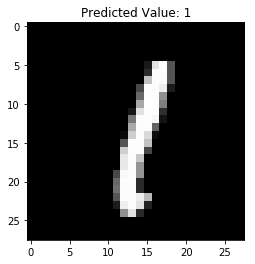

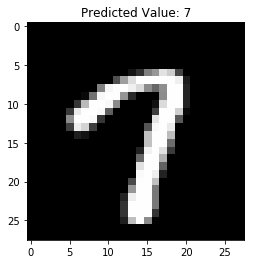

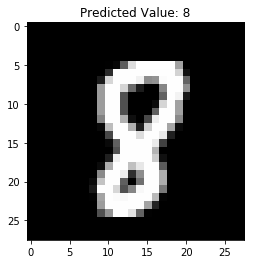

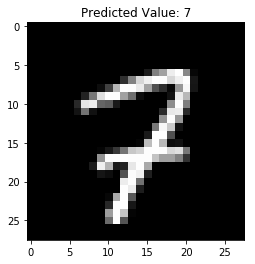

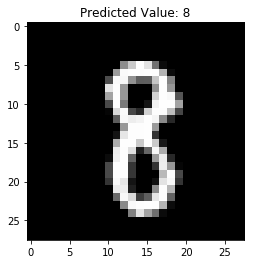

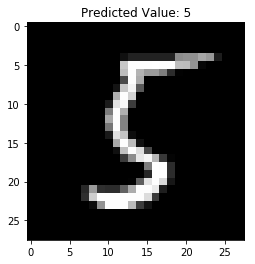

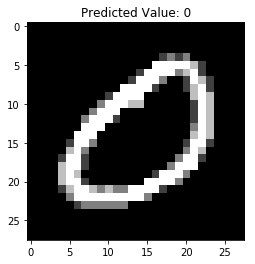

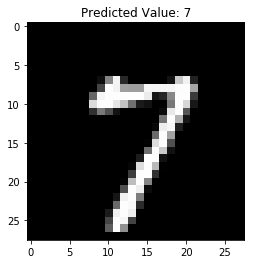

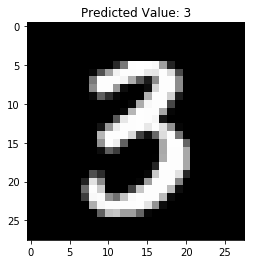

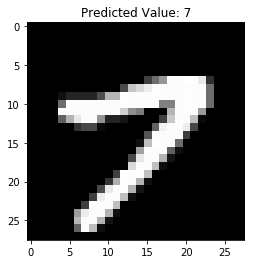

In [36]:
# Generating a random number generator to pick indexes at random from test set

np.random.seed(10)
index = np.random.randint(1,28000,10)

for i in index:
    # Reshaping the 1-D array to 2-D array
    image_coordinates = (np.reshape(test_array[i], (28, 28)))
    
    # Printing prediction value
    plt.title('Predicted Value: {0}'.format(labeled_test[i]))
    
    # Plotting image
    plt.imshow(image_coordinates,cmap='gray')
    plt.show()
    
 

We can see that above images are labeled correctly.